# Image transformation pipeline

This example shows a basic pipeline that reads some frames, resizes them and writes them in an output video.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import videoanalytics
import pandas as pd

In [3]:
from videoanalytics.pipeline import Pipeline
from videoanalytics.pipeline.sources import VideoReader
from videoanalytics.pipeline.sinks import VideoWriter
from videoanalytics.pipeline.sinks.transformation import Resizer

In [4]:
DATA_PATH = "../data"

# Input
INPUT_VIDEO = DATA_PATH+"/test_video.mp4"
START_FRAME = 0
MAX_FRAMES = 10

# Output
OUTPUT_VIDEO = DATA_PATH+ "/output.mp4"

In [5]:
# 1. Create the global context
context = {}

# 2. Create the pipeline
pipeline = Pipeline()

# 3. Add components

# 3.1 Source
pipeline.add_component( VideoReader( "input",context,
                 video_path=INPUT_VIDEO,
                 start_frame=START_FRAME,
                 max_frames=MAX_FRAMES))

# 3.2 Resizer
pipeline.add_component( Resizer("resizer",context,output_w=320,output_h=240) )

# 3.3 Sink
pipeline.add_component(VideoWriter("writer",context,filename=OUTPUT_VIDEO))

  0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
# 4. Define connections
pipeline.set_connections([
    ("input", "resizer"),
    ("resizer", "writer")
])

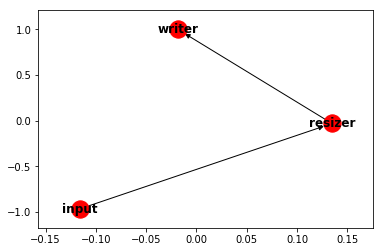

In [7]:
pipeline.plot()

In [8]:
# 5. Execute
pipeline.execute()

In [9]:
# 6. Report (optional)
metrics_df = pd.DataFrame.from_dict(pipeline.get_metrics(), orient='index',columns=["time [s]"])

In [10]:
metrics_df

,time [s]
input_avg_dt,0.004005
resizer_avg_dt,0.010083
writer_avg_dt,0.000064
